## Observations and Insights 

1. The mice on the Ketapril regimen had the highest average volume of tumor, 
 while mice on the Ramicane and Capomulin regimens had the lowest average volume of tumors.
2. There was a trend in the data that reflected the heavier a mouse's weight was,
 the bigger the tumor was.
3. There are almost an equal amount of mice that are male and female in this study.

In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [158]:
# Checking the number of mice.
mouse_count = len(merge_df["Mouse ID"].unique())
mouse_count

249

In [160]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice_df=merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
print("Duplicate mice based on Mouse ID and Timepoint are: ", duplicatemice_df, sep="\n")


Duplicate mice based on Mouse ID and Timepoint are: 
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [161]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemice2_df = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicatemice2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [162]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# cleanmice_df=merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep="first")]
# cleanmice_df=merge_df[merge_df.duplicated (keep="first")]
cleanmice_df=merge_df[merge_df["Mouse ID"]!="g989"]
cleanmice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [163]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = len(cleanmice_df["Mouse ID"].unique())
new_mouse_count

248

## Summary Statistics

In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimens_df = merge_df.groupby("Drug Regimen")
mean = regimens_df["Tumor Volume (mm3)"].mean()
median = regimens_df["Tumor Volume (mm3)"].median()
variance = regimens_df["Tumor Volume (mm3)"].var()
stdev = regimens_df["Tumor Volume (mm3)"].std()
sem = regimens_df["Tumor Volume (mm3)"].sem()

summary_study_df = pd.DataFrame({
    "Mean": mean, 
    "Median": median, 
    "Variance": variance, 
    "Standard Deviation": stdev,
    "SEM": sem,
})

summary_study_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [165]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
cleanmice_df.groupby("Drug Regimen").agg(agg_summary)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

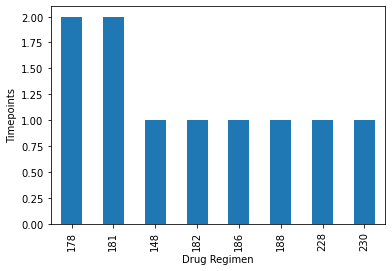

In [166]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_total = cleanmice_df["Drug Regimen"].value_counts() 
timepoints_total_df = pd.DataFrame(timepoints_total)
timepoints_total_df.columns = ["Total Timepoints"]
timepoints_total_plot = timepoints_total_df.value_counts("Total Timepoints", ascending=False).plot(kind="bar")
timepoints_total_plot.set_xlabel("Drug Regimen")
timepoints_total_plot.set_ylabel("Timepoints")
plt.show()


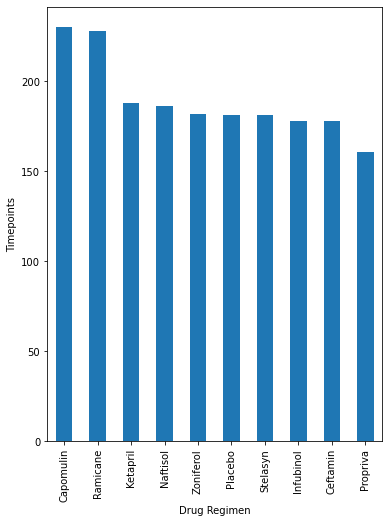

In [167]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_total=merge_df["Drug Regimen"].value_counts()
timepoints_total.plot(kind="bar", figsize=(6,8))
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()


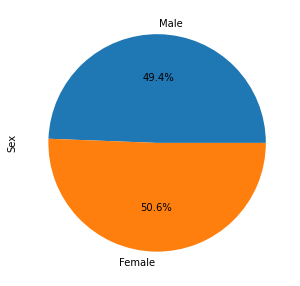

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_df=merge_df.groupby("Sex")
mice_gender_count=mice_gender_df["Sex"].count()
mice_gender_plot=mice_gender_count.plot(labels=["Male", "Female"], kind = "pie", y = "Sex", autopct = "%1.1f%%", figsize=(5, 5))


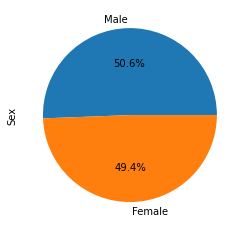

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count=[mice_gender_count["Male"], mice_gender_count["Female"]]
gender_labels=["Male", "Female"]
plt.pie(count, labels=["Male", "Female"], autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=cleanmice_df.groupby("Mouse ID")
greatest_timepoint=greatest_timepoint["Timepoint"].max()
greatest_timepoint_df=pd.DataFrame(greatest_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
volume_tumor_df=pd.merge(greatest_timepoint_df, cleanmice_df, on = ["Mouse ID", "Timepoint"])
volume_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [171]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_tumor_capomulin = []
volume_tumor_ramicane = []
volume_tumor_infubinol = []
volume_tumor_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for e in range(len(volume_tumor_df)-1):
    if volume_tumor_df.loc[e, "Drug Regimen"] == "Capomulin":
        volume_tumor_capomulin.append(volume_tumor_df.loc[e, "Tumor Volume (mm3)"])
    if volume_tumor_df.loc[e, "Drug Regimen"] == "Ramicane":
        volume_tumor_ramicane.append(volume_tumor_df.loc[e, "Tumor Volume (mm3)"])
    if volume_tumor_df.loc[e, "Drug Regimen"] == "Infubinol":
        volume_tumor_infubinol.append(volume_tumor_df.loc[e, "Tumor Volume (mm3)"])
    if volume_tumor_df.loc[e, "Drug Regimen"] == "Ceftamin":
        volume_tumor_ceftamin.append(volume_tumor_df.loc[e, "Tumor Volume (mm3)"])

# List of four tumor volumes for main list to use in for loop
volume_tumor=[volume_tumor_capomulin, volume_tumor_ramicane, volume_tumor_infubinol, volume_tumor_ceftamin]

outlier = []
for e in range(len(volume_tumor)):
# Copied below data and syntaxes from matplotlib class day 3, activity 2
    quartiles = pd.Series(volume_tumor[e]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[e]}:")

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
      
for g in range(len(volume_tumor[e])):
    if (volume_tumor[e][g] < lower_bound) or (volume_tumor[e][g] > upper_bound):
        the_outlier = volume_tumor[e][g]
        outlier.append(the_outlier)
        print(f"The outliers are {outlier}.")



Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile of tumor volum

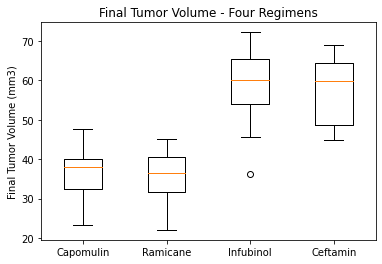

In [172]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Matplotlib class day 3, activity 2

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume - Four Regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(volume_tumor)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

In [173]:
# Generate lsit of mice treated with Capomulin to find a mouse ID to use in next part
volume_tumor_df.loc[volume_tumor_df["Drug Regimen"] == "Capomulin"].head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


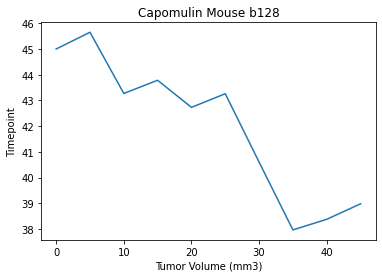

In [174]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

def line_plot(regimen, mouse_id):
    regimen_plot = cleanmice_df.loc[cleanmice_df["Drug Regimen"] == regimen]
    id_data = regimen_plot.loc[regimen_plot["Mouse ID"] == mouse_id]
    plt.plot(id_data["Timepoint"], id_data["Tumor Volume (mm3)"])
    plt.xlabel("Tumor Volume (mm3)")
    plt.ylabel("Timepoint")
    plt.title(regimen + " Mouse " + mouse_id)
    plt.show()
line_plot("Capomulin", "b128")

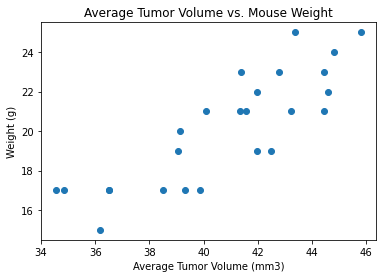

In [175]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_plot_df=cleanmice_df.loc[cleanmice_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
capomulin_avg_tumor=capomulin_plot_df["Tumor Volume (mm3)"].mean()
mouse_weight=capomulin_plot_df["Weight (g)"].unique()
plt.scatter(capomulin_avg_tumor, mouse_weight)
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average tumor volume is 0.84.


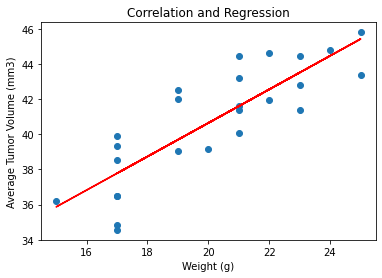

In [176]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Syntax from Matplotlib class day 3, activity 6+
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, capomulin_avg_tumor)
#slope intercept form of the equation of a striaght line is y=mx+b
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, capomulin_avg_tumor)
plt.plot(mouse_weight, regress_values, "r-")
plt.title("Correlation and Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between the mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()
